<a href="https://colab.research.google.com/github/Elispreng/Project-2/blob/main/Spreng_Project_2_Part_3_3_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data and libraries

In [2]:
#import libraries and metrics 

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#Classification Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier


## Tree Model Visualization
from sklearn.tree import plot_tree

from scipy import stats


## Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, classification_report)

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

##Set up configuation display
from sklearn import set_config
set_config(display='diagram') # 'text' or 'diagram'}


In [3]:
## Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data', 
                             figsize=(15,5), normalize='true',
                             cmap='Greens'): 
                             
    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_pred = model.predict(X_test)
     
   ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred, 
                normalize=normalize, cmap=cmap,              
                ax=axes[0])    
    
    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

In [4]:
# Create a function to display supplemental statistics 
def outlier_statistics(df, column_name):
    
    # Determine Outliers - Only if this is a numeric column
    if (df[column_name].dtype == 'int64') | (df[column_name].dtype == 'float64'):
        # Create outlier filters
        q1 = df[column_name].quantile(0.25) # 25th percentile
        q3 = df[column_name].quantile(0.75) # 75th percentile
        iqr = q3 - q1 # Interquartile range
        low_limit = q1 - (1.5 * iqr) # low limit
        high_limit = q3 + (1.5 * iqr) # high limit
        # Create outlier dataframes
        low_df = df[(df[column_name] < low_limit)]
        high_df = df[(df[column_name] > high_limit)]
        # Calculate the outlier counts and percentages
        low_oulier_count = low_df.shape[0]
        low_outlier_percentge = round(((low_oulier_count)/(df.shape[0])*100),1)
        high_oulier_count = high_df.shape[0]
        high_outlier_percentge = round(((high_oulier_count)/(df.shape[0])*100),1)
        # Display the outlier counts.
        print(f'Outliers: {low_oulier_count} ({low_outlier_percentge})% low, {high_oulier_count} ({high_outlier_percentge})% high')

In [5]:
# import pandas, numpy and load google drive
import pandas as pd
import numpy as np

from google.colab import drive


In [6]:
#load data and create dataframe
filename2 = '/content/drive/MyDrive/Project 2/adult[1].csv'
adult_df = pd.read_csv(filename2)

# Data Preparation and Initial Cleaning

## Inspect Data

In [7]:
#  Inspect the first (5) rows of the dataframe
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


- The data has loaded correctly. 

In [8]:
## Display the number of rows and columns for the dataframe
adult_df.shape
print(f'There are {adult_df.shape[0]} rows, and {adult_df.shape[1]} columns.')
print(f'The rows represent {adult_df.shape[0]} participants, and the columns represent {adult_df. shape[1]-1} features and 1 target variable.')

There are 48842 rows, and 15 columns.
The rows represent 48842 participants, and the columns represent 14 features and 1 target variable.


In [9]:
# check the info
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Inspect Columns for Datatypes

In [10]:
## Display column names and datatypes
adult_df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

- All columns datatyoes appear correct. 

### Inspect Column Names for Errors

In [11]:
## Display column names
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Inspect Values for Errors


## Clean the data

### Remove Unnecessary Columns


- There are not any unnecessary columns.

### Remove Unnecessary Rows

### Duplicates

In [12]:
# Display the number of duplicate rows
print(f'There are {adult_df.duplicated().sum()} duplicate rows.')

There are 52 duplicate rows.


In [13]:
# Drop duplicate rows
adult_df = adult_df.drop_duplicates()

In [14]:
# Check for duplicates
adult_df.duplicated().sum()

0

- There are zero duplicate rows. 

### Missing Values

In [15]:
# Checking for missing values
adult_df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

- There are 0 missing values

## Remove Redundant columns and Data Inconsistencies (Recommended from Amro)

In [16]:
# create a copy of the data
census_df = adult_df.copy()

In [17]:
# drop educational-num column because it is redundant 
census_df.drop('educational-num', inplace = True, axis =1)

In [18]:
# drop the values of "?"
census_df = census_df[census_df != '?']


## Column Hours per week to employment status (recommended from Amro)

In [19]:
part_time_filter = census_df['hours-per-week']< 35
print(sum(part_time_filter))
part_time_filter.replace(  {True: 'Part time', False: 'Full time'}  ).value_counts()
census_df['employment_status'] = part_time_filter.replace(  {True: 'Part time', False: 'Full time'}  ).value_counts()


8386


In [20]:
# drop the hours-per-week column
census_df.drop('hours-per-week', inplace = True, axis =1)

## Check for Inconsistencies

# Fix the column datatypes

In [21]:
# Check the numeric columns for inconsistencies
census_df.describe(include="number")


,age,fnlwgt,capital-gain,capital-loss,employment_status
count,48790.000000,4.879000e+04,48790.000000,48790.000000,0.0
mean,38.652798,1.896690e+05,1080.217688,87.595573,NaN
std,13.708493,1.056172e+05,7455.905921,403.209129,NaN
min,17.000000,1.228500e+04,0.000000,0.000000,NaN
25%,28.000000,1.175550e+05,0.000000,0.000000,NaN
50%,37.000000,1.781385e+05,0.000000,0.000000,NaN
75%,48.000000,2.376062e+05,0.000000,0.000000,NaN
max,90.000000,1.490400e+06,99999.000000,4356.000000,NaN


In [22]:
# Check the object columns for inconsistencies
census_df.describe(include="object")


,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45995,48790,48790,45985,48790,48790,48790,47934,48790
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


## Column 8: Race (no visible problems)

In [23]:
# Check the 'race' column for inconsistencies
census_df['race'].value_counts()

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

## Column 7: Relationship (no visible problems)

In [24]:
# Check the 'relationship' column for inconsistencies
census_df['relationship'].value_counts()

Husband           19703
Not-in-family     12557
Own-child          7569
Unmarried          5124
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

## Column 13: Native Country 

In [25]:
#look at values
adult_df['native-country'].value_counts()

United-States                 43792
Mexico                          943
?                               856
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

- Recommended from Amro

In [26]:
#check that '?' values are removed
census_df['native-country'].value_counts()

United-States                 43792
Mexico                          943
Philippines                     294
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

### Create continent column (recommended from Amro)

In [27]:
# drop values with 'South'
census_df = census_df[census_df != 'South']


In [28]:
mapdictionary = {'Germany': 'Europe', 'United-States': 'US', 'Canada': 'North America',
                 'Philippines': 'Pacific', 'Mexico': 'North America', 'Puerto-Rico': 'Caribbean',
                 'El-Salvador': 'Latin America', 'India': 'India', 'Cuba': 'Caribbean',
                 'England': 'Europe', 'China': 'Asia', 'Jamaica': 'Caribbean',
                 'Italy': 'Europe', 'Dominican-Republic': 'Caribbean', 'Japan': 'Asia',
                 'Poland': 'Europe', 'Vietnam': 'Asia', 'Guatemala': 'Latin America',
                 'Columbia': 'Latin America', 'Haiti': 'Caribbean', 'Portugal': 'Europe',
                 'Taiwan': 'Asia', 'Iran':'Asia', 'Greece': 'Europe', 'Nicaragua': 'Latin America',
                 'Peru': 'Latin America', 'Ecuador': 'Latin America', 'France': 'Europe',
                 'Ireland': 'Europe', 'Hong': 'Asia', 'Thailand': 'Asia', 'Cambodia': 'Asia',
                 'Trinadad&Tobago': 'Caribbean', 'Outlying-US(Guam-USVI-etc)': 'US',
                 'Laos': 'Asia', 'Scotland': 'Europe', 'Honduras': 'Latin America',
                 'Hungary': 'Europe', 'Holand-Netherlands': 'Europe', 'Yugoslavia': 'Europe' }
census_df['regions'] = census_df['native-country'].replace(mapdictionary)

In [29]:
# check values
census_df['regions'].value_counts()

US               43815
North America     1125
Europe             780
Caribbean          633
Asia               535
Latin America      486
Pacific            294
India              151
Name: regions, dtype: int64

## Column 1: Work/class 

In [30]:
# check Work/class column
adult_df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

- Recommended from Amro

In [31]:
#drop never worked and without pay because irrelevant for target
census_df = census_df[census_df["workclass"].str.contains("Without-pay") == False]
census_df = census_df[census_df["workclass"].str.contains("Never-worked") == False]


In [32]:
census_df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Name: workclass, dtype: int64

## Column 3: Education (no visible problems)

In [33]:
# check education
adult_df['education'].value_counts()

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

- No noticeable problems with these values. 

### Create educational groups (Recommended from Amro)

- Professional programs generally require a college degree before you start them and then at least three years of study to complete

In [34]:
eddictionary = {'HS-grad': 'HS-grad', '1st-4th': 'primary', '5th-6th': 'primary',
                 '7th-8th': 'secondary', '9th': 'secondary', '12th': 'secondary',
                 'Preschool': 'primary', 'Doctorate': 'Graduate', 'Prof-school': 'Graduate',
                 '11th': 'secondary', 'Bachelors': 'College', 'Masters': 'Graduate',
                 'Some-college': 'HS-grad', 'Assoc-voc': 'College', 'Assoc-voc': 'College',
                 '10th': 'secondary', 'Grad-school': 'Graduate', 'Assoc-acdm':'College' }
census_df['edstatus'] = census_df['education'].replace(eddictionary)
census_df['edstatus'].value_counts()

HS-grad      24965
College      11265
secondary     4995
Graduate      3975
primary        764
Name: edstatus, dtype: int64

## Column 6: Occupation

In [35]:
# check occupation column
adult_df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

- There are 2805 '?' to be addressed

In [36]:
# check Work/class column
census_df['workclass'].value_counts()

Private             33860
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Name: workclass, dtype: int64

## Column 9: Gender 

In [37]:
# check gender column
adult_df['gender'].value_counts()

Male      32614
Female    16176
Name: gender, dtype: int64

## Column 14: Income (Target)

In [38]:
# check income column
adult_df['income'].value_counts()

<=50K    37109
>50K     11681
Name: income, dtype: int64

# Exploratory Visuals

### Visual #1: Age

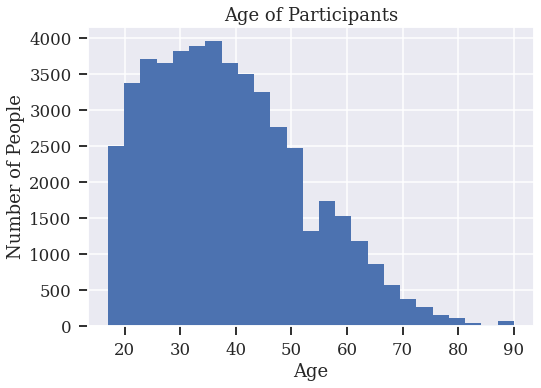

In [83]:
#histogram for Age
adult_df['age'].hist(bins = 25)
plt.ticklabel_format(useOffset=False, style='plain')
plt.title ('Age of Participants')
plt.ylabel('Number of People')
plt.xlabel("Age");

- There is a significant skew to the left. The majority of the participants are under 50. There was also a significant number of people under 30. Between  the ages of 20 and 50, there are at least 2,500 poeple in each bin. 
- Action plan: The signinficant number of people  in the  bins under 50 merit more analysis. 

### Visual #2: Race

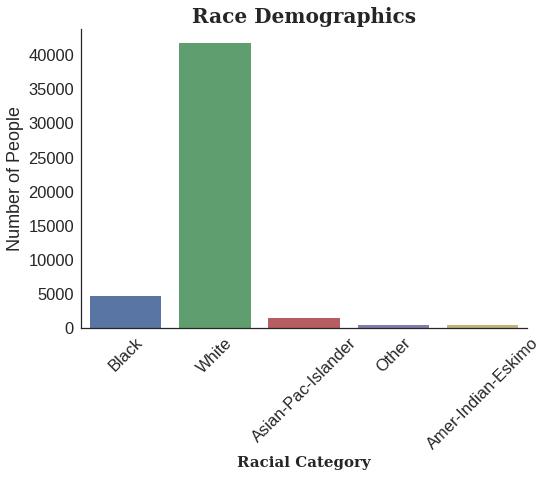

In [96]:
#create race countplot
sns.set_context('talk')
with plt.style.context('seaborn-white'):
  fig, ax =plt.subplots()
plt.rcParams['font.family'] = 'serif'
ax = sns.countplot(data=adult_df,x='race')
ax.set_title('Race Demographics', fontfamily='serif',fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Race', fontfamily= 'serif', fontsize = 15, fontweight = 'bold')
plt.xlabel('Racial Category')
plt.ylabel('Number of People')
plt.xticks(rotation = 45);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

- This countplot shows the white category at the  highest count and seems not to match the actual US statistics. 
- Action plan: I would want to see if there is a relationship between income and racial categories. 

### Visual #7: Gender

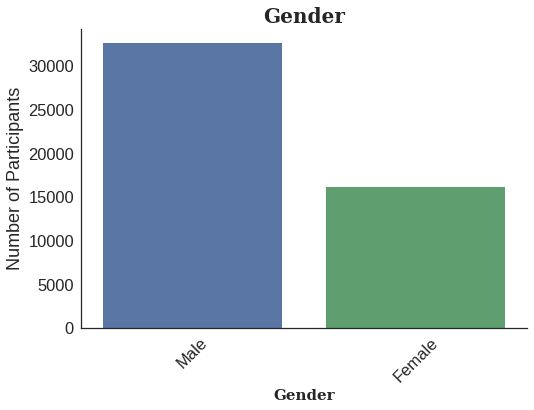

In [97]:
#create race countplot
sns.set_context('talk')
with plt.style.context('seaborn-white'):
  fig, ax =plt.subplots()
plt.rcParams['font.family'] = 'serif'
ax = sns.countplot(data=adult_df,x='gender')
ax.set_title('Gender Demogrpahics', fontfamily='serif',fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Gender', fontfamily= 'serif', fontsize = 15, fontweight = 'bold')
plt.ylabel('Number of Participants')
plt.xticks(rotation = 45);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

- This countplot shows a heavy weighting of males in the dataset that does not correlate to US Census data.
- Action plan: Look at gender and income. 

# Summary and Further Recommendations


1.   The data is heavily skewed to United States as native country
2.   The age category may be significant in looking at income.
3.   Education needs a simplified graphic.
4.   Relationship, race, gender need to be investigatd more 








## Additional  Better Visuals for the new data columns

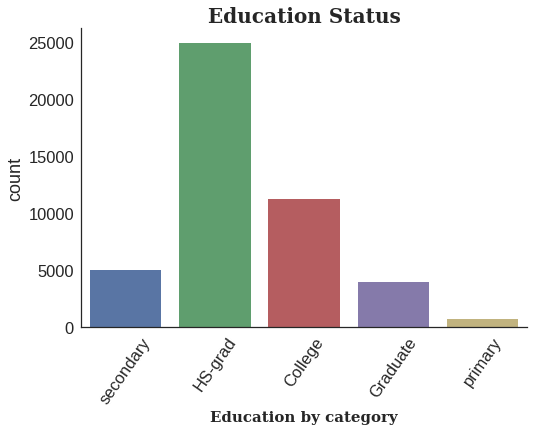

In [61]:
#create countplot for education
sns.set_context('talk')
with plt.style.context('seaborn-white'):
  fig, ax =plt.subplots()
plt.rcParams['font.family'] = 'serif'
ax = sns.countplot(data=census_df,x='edstatus')
ax.set_title('Education Status', fontfamily='serif',fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Education by category', fontfamily= 'serif', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation = 55);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False) 

- This countplot clearly shows  the bigger quantity of the high school grads. However this does not match the census bureau statistics. https://www.census.gov/newsroom/press-releases/2022/educational-attainment.html#:~:text=Data%20Highlights-,Age,highest%20level%20of%20school%20completed.
- Action plan: Explore the relationship between education and income.

## Visuals for Part 3

## Heatmap

<AxesSubplot:>

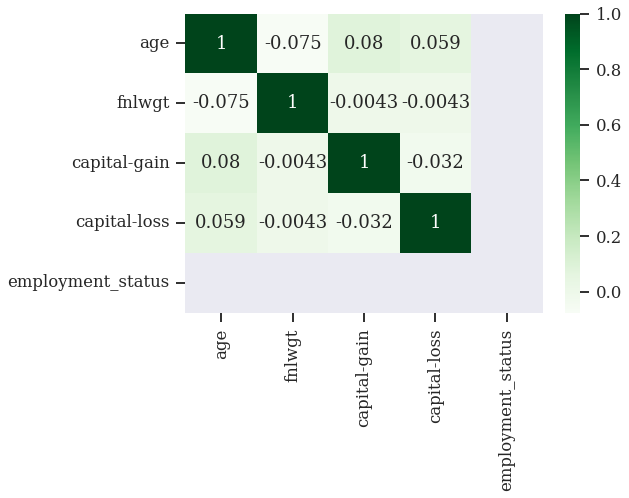

In [66]:
#create a heatmap
corr = census_df.corr()

sns.heatmap(corr, cmap = 'Greens', annot = True)

- The heatmap is inconclusive becasuse many of the variable are not continuous/numeric.  There are no moderate or strong correlations. 

## Visual #1: Income and Age

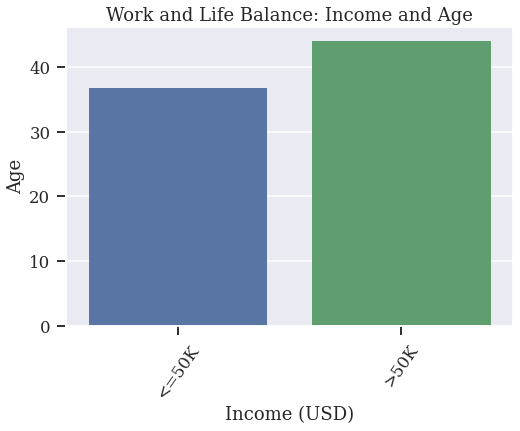

In [70]:
#Plot Income by employment and age
sns.barplot(data = census_df, x = 'income', y = 'age',ci=None)
plt.title('Work and Life Balance: Income and Age')
plt.xticks(rotation = 55);
plt.xlabel("Income (USD)")
plt.ylabel("Age");

- This barplot shows a relationship between income and age
- Action: Investigate whether other factors impact income. 

White                 39381
Black                  4353
Asian-Pac-Islander     1420
Amer-Indian-Eskimo      435
Other                   375
Name: race, dtype: int64


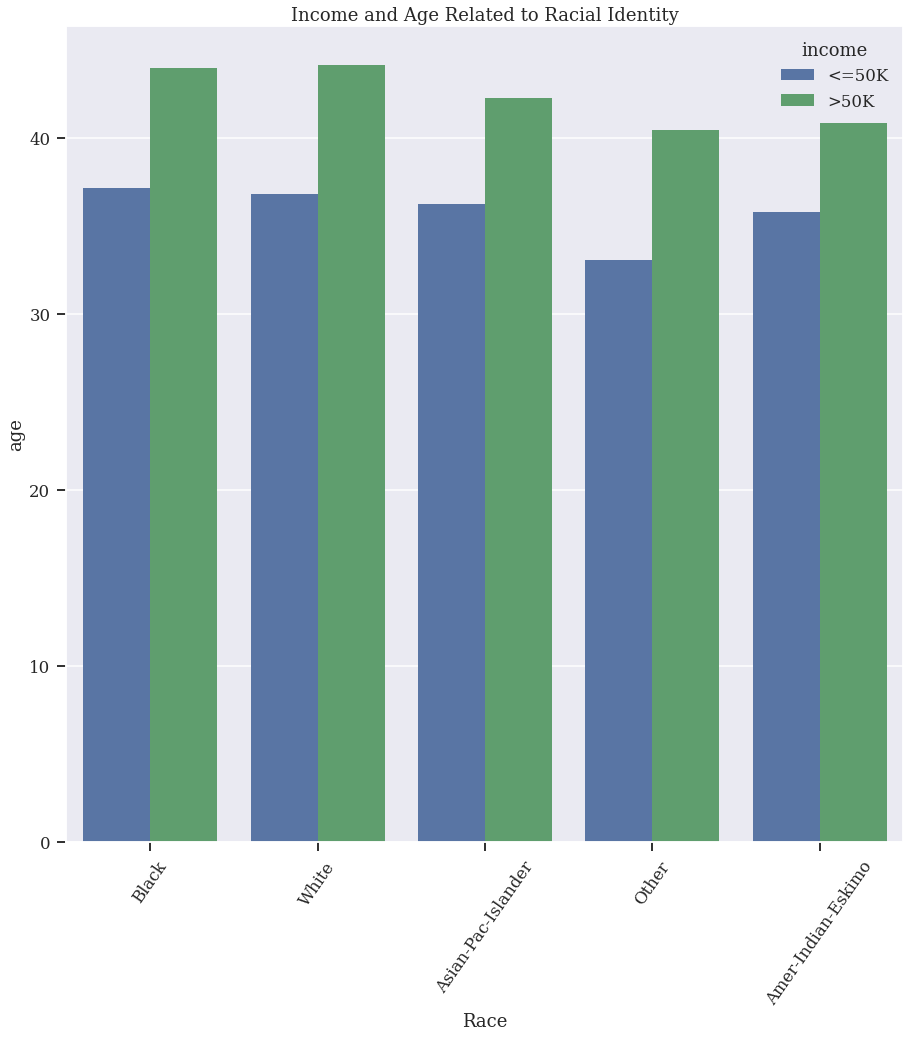

In [75]:
#Visual for race
fig, ax = plt.subplots(figsize=(15,15))

sns.barplot(data = census_df, x = 'race', y = 'age', hue ='income', ci=None)
plt.xticks(rotation = 55);
plt.xlabel("Race")
plt.title('Income and Age Related to Racial Identity')
print(census_df['race'].value_counts())

- This graph clearly shows that age and income are related but there are other questions. It appears that indiviuals over 40 are more likely to be at highter income level of >50K.
- Action Plan:  Does gender matter? Does education matter?

## Visual #2:

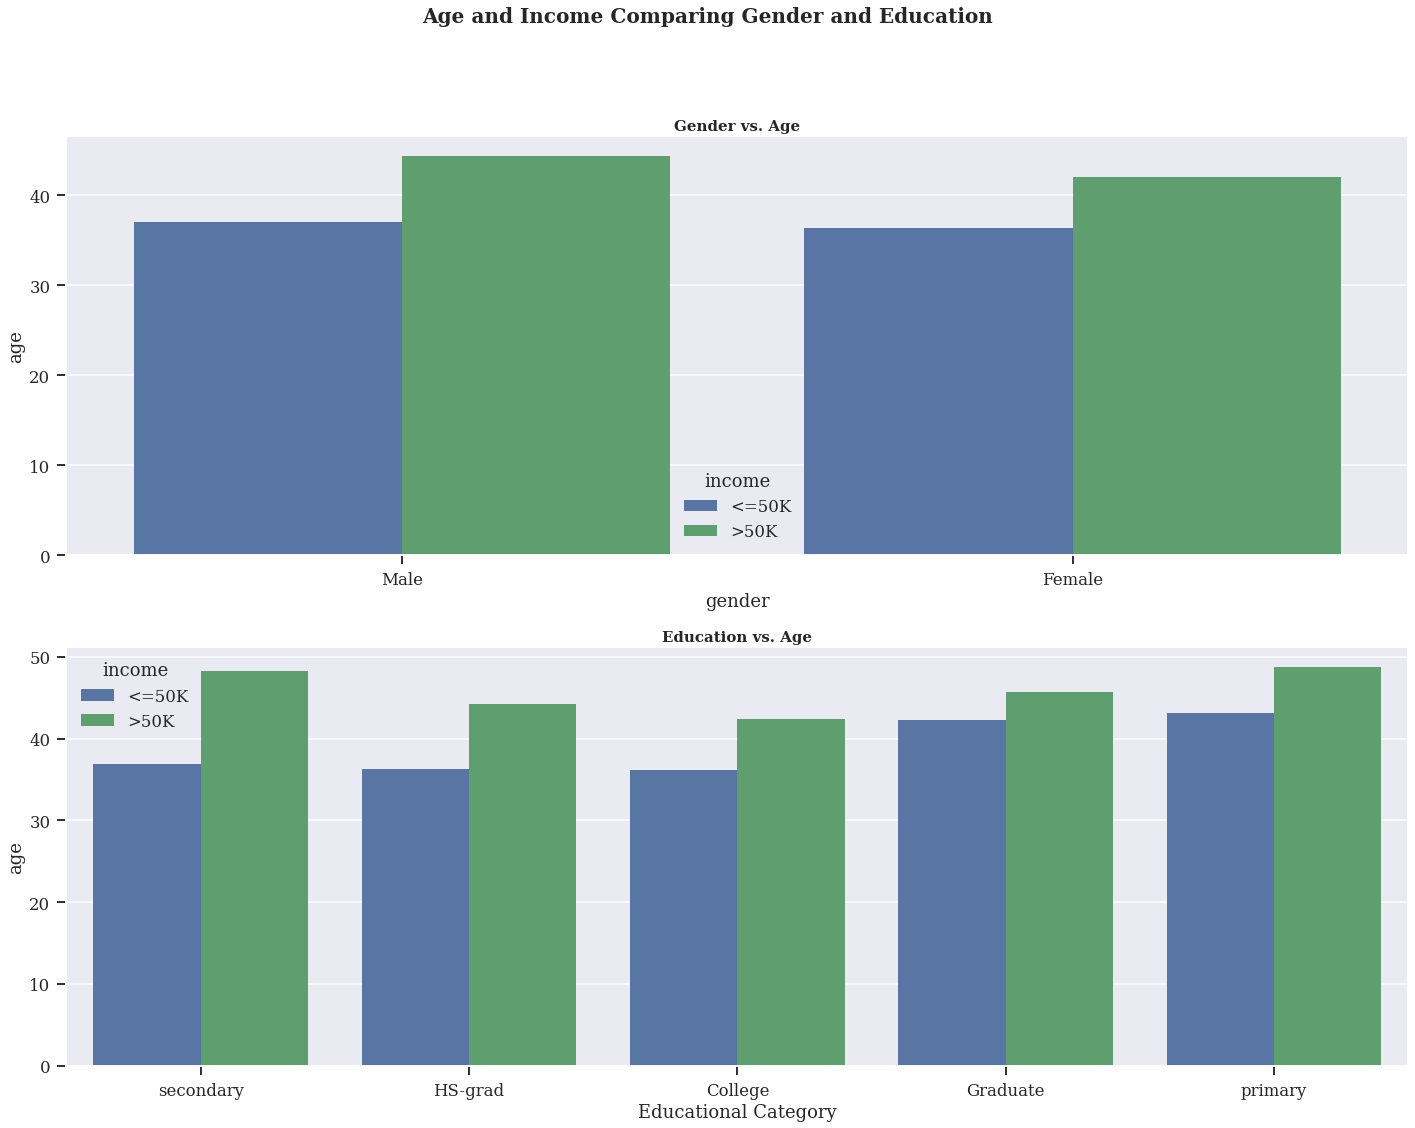

In [72]:
fig, axes = plt.subplots(nrows = 2, figsize = (20,15))

sns.barplot(data = census_df, x = 'gender', y = 'age', hue='income', ci=None, ax = axes[0])
axes[0].set_title('Gender vs. Age', fontsize = 15, fontweight = 'bold')


sns.barplot(data = census_df, x = 'edstatus', y = 'age', hue='income', ci=None, ax = axes[1])
axes[1].set_title('Education vs. Age', fontsize = 15, fontweight = 'bold')

plt.xlabel("Educational Category")


fig.suptitle('Age and Income Comparing Gender and Education', fontsize = 20, fontweight = 'bold', y = 1.05)

fig.tight_layout()

- These two graphs further explore the questions of income and age looking at gender and education.   While ideas about the gender gap are relevant, age  still appears signficant in the first barplot. The next question about education also supports a correlation between age and income as primary and education as secondary  factor. American demographics are close to even in biological sex. From looking at my gender graphs, an inconsitency emerges. Males seems double to females in a simple exploratory visual and this inconstitency limits the ability to draw insights. (https://www.statista.com/statistics/241495/us-population-by-sex/#:~:text=As%20of%20July%201%2C%202021,has%20remained%20steady%20since%202010.).
- The  possible story of the American Dream in this dataset  is that if you over 40 you can make more than 50K regardless if you are hightly educated.  You   have a slightly better chance if you are male. although the race demographics are skewed (this data shows it less than 9% and actual statistics are closer to 14%), this data reinforces the problems of racial bias in income equality. 
